In [33]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
Data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/digit/train.csv')
Result=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/digit/test.csv')
Data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [36]:
data=Data
result=Result
Result.shape

(28000, 784)

In [37]:
data=Data.drop('label',axis=1)
y=Data['label']
ytrain=torch.tensor(y[:33600].values,dtype=torch.long)
xtrain=torch.tensor(data[:33600].values,dtype=torch.float32)
ytest=torch.tensor(y[33600:].values,dtype=torch.float32)
xtest=torch.tensor(data[33600:].values,dtype=torch.float32)

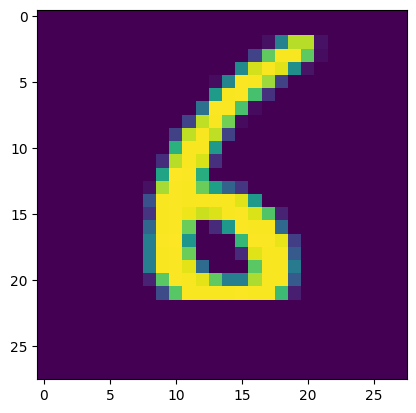

In [38]:
#ytrain.dtype
plt.imshow(data[45:46].values.reshape(28,28))


In [39]:
train=torch.utils.data.TensorDataset(xtrain,ytrain)
dtr =torch.utils.data.DataLoader(train,batch_size=16, shuffle=False)
test=torch.utils.data.TensorDataset(xtest,ytest)
dte=torch.utils.data.DataLoader(train,batch_size=16,shuffle=False)
train_features_batch, train_labels_batch = next(iter(dtr))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([16, 784]) torch.Size([16])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_block = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128*7*7, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(x.size(0), -1)
        x = self.linear_block(x)

        return x


In [55]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(
                                in_channels=1,
                                out_channels=8,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=(1, 1)
        )

        self.pool = nn.MaxPool2d(
                                 kernel_size=(2, 2),
                                 stride=(2, 2)
        )


        self.conv2 = nn.Conv2d(
                                in_channels=8,
                                out_channels=16,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=(1, 1),
        )

        self.fc1 = nn.Linear(16 * 7 * 7, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))                                      # 8,28,28
        x = self.pool(x)                                               # 8,14,14
        x = nn.functional.relu(self.conv2(x))                                      # 16,14,14
        x = self.pool(x)                                               #16,7,7

#         print(x.shape)
        x = x.reshape(x.shape[0], -1)

        x = self.fc1(x)
        return x

In [47]:
class digits(nn.Module):
  def __init__(self):
    super(digits,self).__init__()
    self.l=nn.Sequential(
        nn.Conv2d(1,8,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)),
        nn.Conv2d(8,16,kernel_size=(3,3), stride=(1, 1),padding=(1, 1),),
        nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)),
        nn.Linear(16*7*7,10)
    )
  def forward(self,x):
    return self.l(x)

In [41]:
class digit(nn.Module):
  def __init__(self):
    super().__init__()
    self.l=nn.Sequential(
          nn.Linear(784,64),
          nn.ReLU(),
          nn.Linear(64,16),
          nn.ReLU(),
          nn.Linear(16,10),
          nn.LogSoftmax(dim=1)

    )
  def forward(self,x):
    return self.l(x)

In [64]:
m=CNN()
# l=nn.NLLLoss()
l=nn.functional.cross_entropy
p=torch.optim.Adam(params=m.parameters(),lr=0.001)


In [65]:
b=[]
epochs=10
ctr=[]
cte=[]
te=0
for epoch in range(epochs) :
  trloss=0
  for batch , (xtr,ytr) in enumerate(dtr):
      m.train()
      xtr=xtr.reshape(xtr.shape[0],1,28,28)
      yr=m(xtr/255)

      loss=l(yr,ytr)
      p.zero_grad()
      loss.backward()
      p.step()
      trloss +=loss
      if batch%10==0:
        b.append(batch+(epoch)*2100)
        ctr.append(trloss.detach().numpy())
        cte.append(te)

  trloss /= len(dtr)

  teloss=0
  m.eval()
  with torch.inference_mode():
    for i , (xte,yte) in enumerate(dte):
     xte=xte.reshape(xte.shape[0],1,28,28)
     ye=m(xte/255)
     teloss+=l(ye,yte)
     te =teloss.detach().numpy()

  te /= len(dte)
  cte.append(te)





df=pd.DataFrame({"train_loss":ctr,"batch":b,})
print(len(cte))

df


2110


,train_loss,batch
0,0.27261436,0
1,0.27261436,10
2,0.27261436,20
3,0.27261436,30
4,0.27261436,40
...,...,...
2095,0.01988876,20950
2096,0.01988876,20960
2097,0.01988876,20970
2098,0.01988876,20980


16


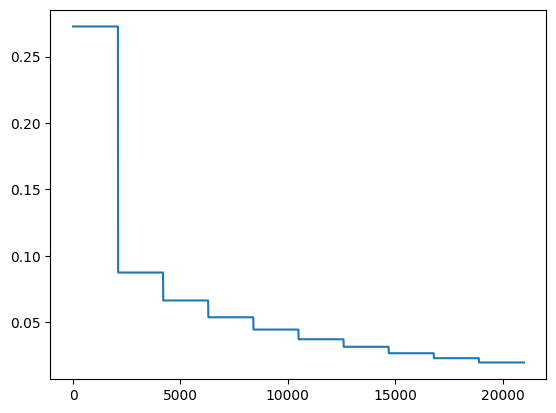

In [66]:
plt.plot(b,ctr)
df.head(120)
print(len(xtr))

In [ ]:
cte

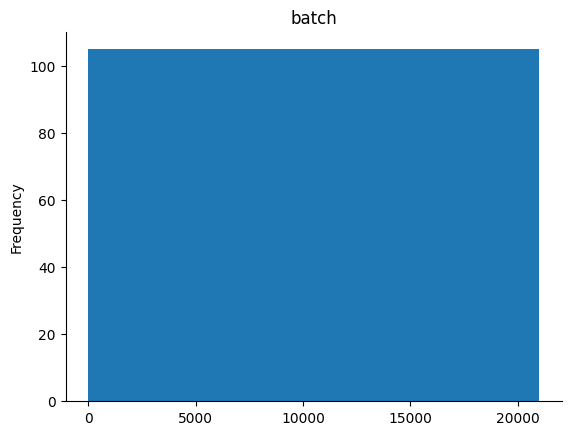

In [68]:
# @title batch

from matplotlib import pyplot as plt
df['batch'].plot(kind='hist', bins=20, title='batch')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
xte=torch.tensor(Result.values,dtype=torch.float32)

with torch.inference_mode():
    yp=m(xte)
    ypr=torch.softmax(yp,dim=1)
    ypre=ypr.argmax(dim=1)
number=[(i+1) for i in range(28000)]
sub=pd.DataFrame(number,columns=['ImageId'])


sub['Label']=ypre
sub=sub.astype({'Label':int})
sub.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/digit/sample_submission.csv", index=False)

print(sub)
sub['Label'].value_counts()


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [28000, 784]

In [ ]:
plt.plot(cte,ctr)